# 尼日利亚观众音乐品味的聚类分析

In [12]:
# 数据分析常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 去除警告
import warnings
warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv('nigerian-songs.csv')
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [13]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

歌曲名称、专辑、艺术家、艺术家顶级流派、发行日期、长度、流行度、舞蹈性、音乐性、能量、乐器性、活跃度、响度、语速、节奏和时值  
**各列都是530，均不存在空值，故无需进行缺失值处理。数据类型见Dtype。通过观察，这是一个比较规整的数据集，无需进行缺失值等处理。**


In [14]:
# 替换列名称，便于理解
# 原始列名: ['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']
data.columns = ['歌曲名称', '专辑', '歌手', '歌手主要流派', '发行日期', '时长', '流行度', '舞蹈性', '声学性', '能量值', '器乐性', '现场感', '响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']
# 查看数据的前5行
data

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [15]:
data.nunique()

歌曲名称         497
专辑           428
歌手           171
歌手主要流派        19
发行日期          20
时长           518
流行度           66
舞蹈性          304
声学性          406
能量值          329
器乐性          294
现场感          362
响度(dB)       504
语音性/说唱成分     386
节拍速度(BPM)    514
拍号             3
dtype: int64

In [16]:
# 提取和音乐构成相关的特征列-非人工评分，如'舞蹈性', '声学性', '能量值', '器乐性', '现场感'（这里我是想使用纯歌曲本身的特性，而非感官体验得到的特性）
music_features = data[['响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']]  # 音乐构成相关特征

# 提取和音乐感官体验相关的特征列-人工评分，如'舞蹈性', '声学性', '能量值', '器乐性', '现场感'
music_experience = data[['舞蹈性', '声学性', '能量值', '器乐性', '现场感']]  #音乐体验相关特征

In [17]:
# 归一化处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
music_features = scaler.fit_transform(music_features)
music_experience = scaler.fit_transform(music_experience)

# 音乐构成特征聚类 --> 歌曲技法聚类

In [18]:
music_features

array([[0.6349278 , 0.11332785, 0.494207  , 1.        ],
       [0.68802647, 0.68325792, 0.47326626, 0.        ],
       [0.61346771, 0.03002879, 0.47334941, 0.5       ],
       ...,
       [0.77316486, 0.0802139 , 0.41135179, 0.5       ],
       [0.64254914, 0.42410531, 0.43171739, 0.5       ],
       [0.86030886, 0.22871246, 0.31374383, 0.5       ]])

## KMenas聚类

### 寻找最佳聚类数K

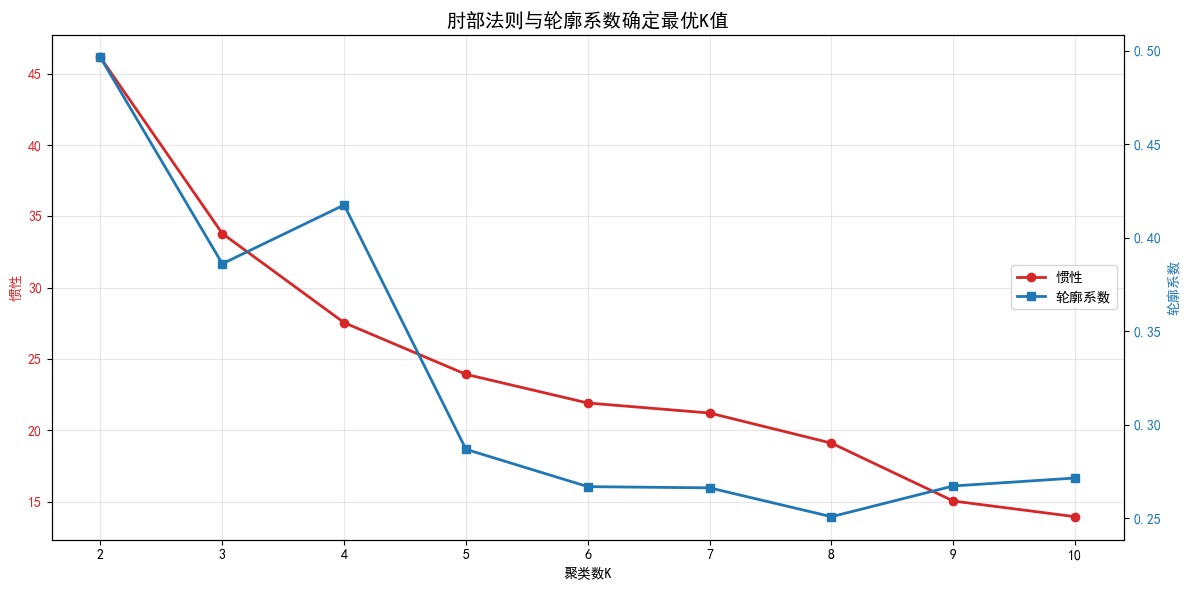

K值分析结果：
K	惯性		轮廓系数
------------------------------
2	46.14		0.496
3	33.80		0.386
4	27.55		0.417
5	23.93		0.287
6	21.92		0.267
7	21.22		0.266
8	19.10		0.251
9	15.05		0.267
10	13.95		0.271


In [19]:
# 使用肘部法则+轮廓系数确定K值（双轴图）
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 计算肘部法则的惯性值
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(music_features)
    
    # 计算惯性（肘部法则）
    inertia.append(kmeans.inertia_)
    
    # 计算轮廓系数
    score = silhouette_score(music_features, kmeans.labels_)
    silhouette_scores.append(score)

# 创建双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 第一个y轴：惯性（肘部法则）
color1 = 'tab:red'
ax1.set_xlabel('聚类数K')
ax1.set_ylabel('惯性', color=color1)
line1 = ax1.plot(range(2, 11), inertia, marker='o', color=color1, linewidth=2, markersize=6, label='惯性')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# 第二个y轴：轮廓系数
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('轮廓系数', color=color2)
line2 = ax2.plot(range(2, 11), silhouette_scores, marker='s', color=color2, linewidth=2, markersize=6, label='轮廓系数')
ax2.tick_params(axis='y', labelcolor=color2)

# 设置标题和图例
plt.title('肘部法则与轮廓系数确定最优K值', fontsize=14, fontweight='bold')

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

# 设置x轴刻度
ax1.set_xticks(range(2, 11))

# 调整布局
plt.tight_layout()
plt.show()

# 可选：打印数值以便分析
print("K值分析结果：")
print("K\t惯性\t\t轮廓系数")
print("-" * 30)
for i, k in enumerate(range(2, 11)):
    print(f"{k}\t{inertia[i]:.2f}\t\t{silhouette_scores[i]:.3f}")


#### K值分析结果解读与最佳聚类数建议
#### 指标含义与分析逻辑
1. **惯性（Inertia）**  
   即簇内平方和（SSE），反映簇内数据的分散程度。惯性越小，说明簇内数据越紧凑，聚类效果理论上越好。但随着K值增加，惯性会单调递减（因更多簇可划分更小的子集），因此需结合其他指标判断“拐点”。
2. **轮廓系数（Silhouette Coefficient）**  
   衡量样本点属于当前簇的可信度，取值范围[-1,1]：  
   - 接近1：样本与本簇紧密，与其他簇区分明显；  
   - 接近0：样本可能在两个簇的边界；  
   - 接近-1：样本可能被错误分类。  
   轮廓系数是判断聚类质量的核心指标，优先选择其峰值对应的K值。
K=4：轮廓系数（0.417 ）为次优，惯性下降明显（比 K=2 降 40%+ ），聚类更细分,选择K=4

### k=4的聚类结果可视化

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(music_features)
# 获取聚类标签
labels = kmeans.labels_
# 将聚类标签添加到原始数据中
data['音乐构成聚类'] = labels
# 查看聚类结果
data.head()

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号,音乐构成聚类
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,2
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4,0
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,0
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,0


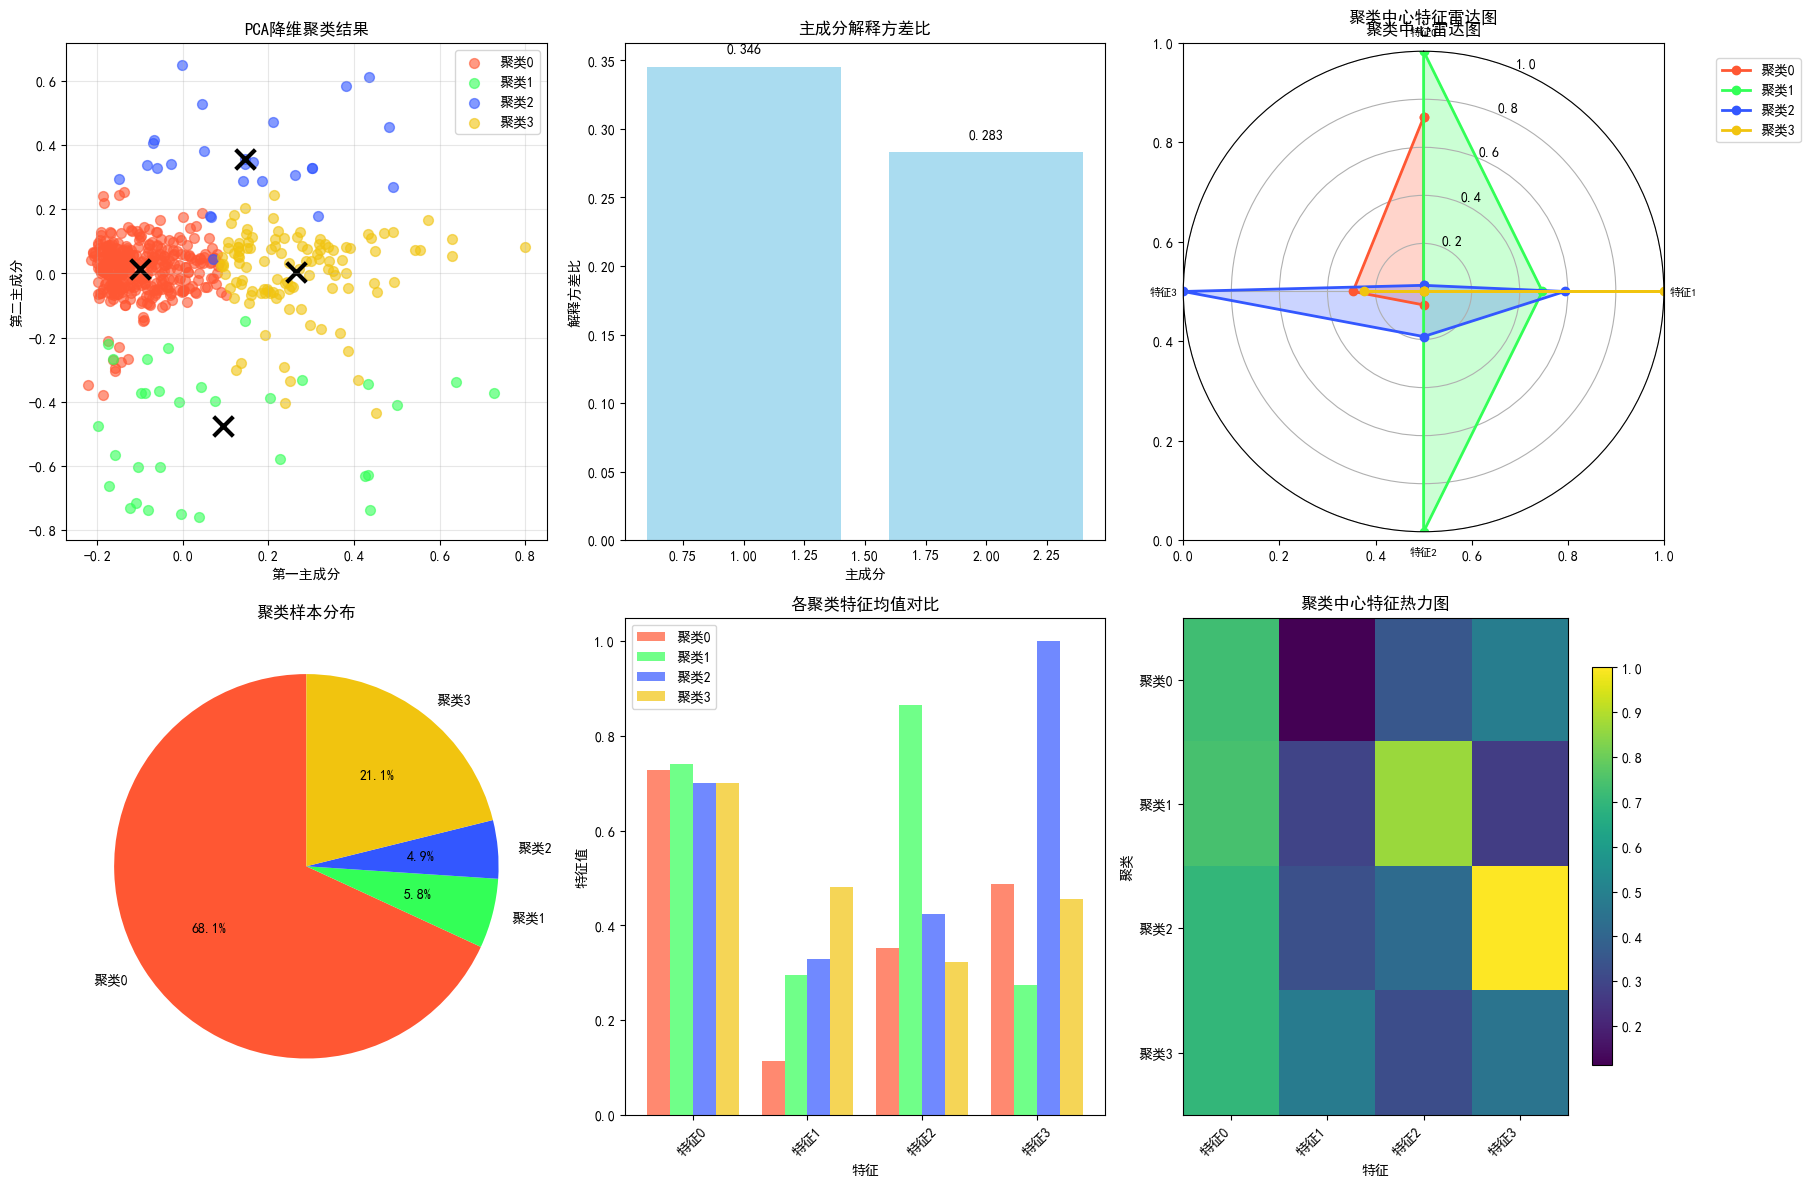

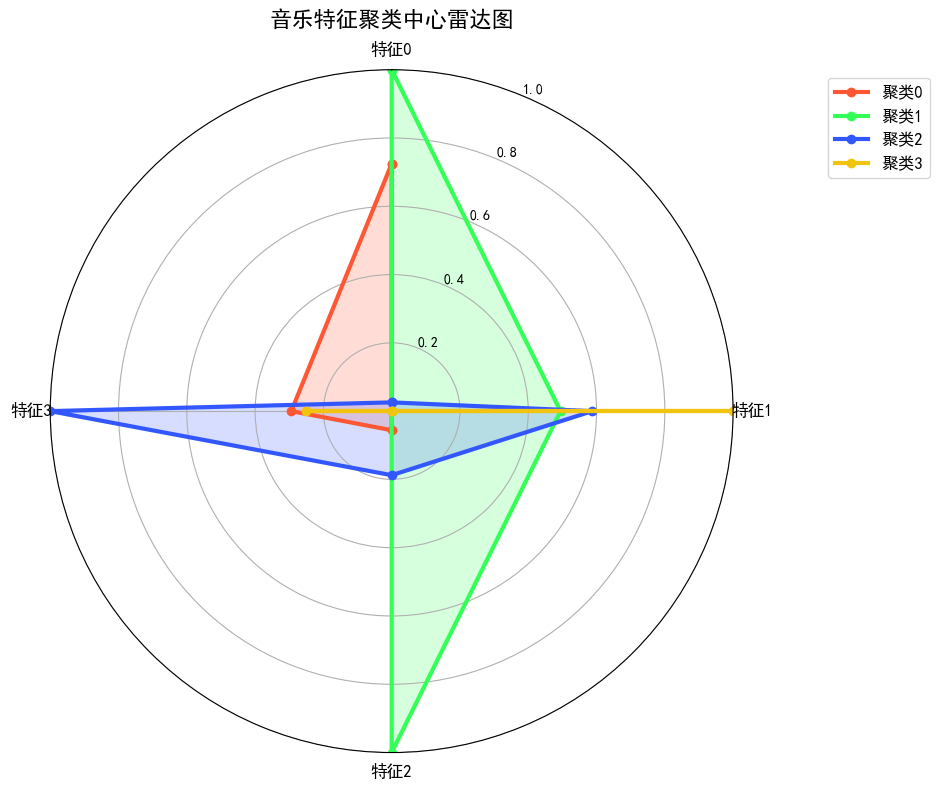


各聚类中心特征值:

聚类 0 (样本数: 361):
------------------------------
特征0: 0.729
特征1: 0.113
特征2: 0.353
特征3: 0.488

聚类 1 (样本数: 31):
------------------------------
特征0: 0.740
特征1: 0.295
特征2: 0.866
特征3: 0.274

聚类 2 (样本数: 26):
------------------------------
特征0: 0.702
特征1: 0.329
特征2: 0.424
特征3: 1.000

聚类 3 (样本数: 112):
------------------------------
特征0: 0.700
特征1: 0.480
特征2: 0.322
特征3: 0.455

聚类结果预览:
   音乐构成聚类
0       2
1       3
2       0
3       0
4       0
5       3
6       3
7       0
8       0
9       0

各聚类特征分析:

聚类 0:
样本数量: 361
主要特征:
  - 特征1: 低于平均值 0.099
  - 特征2: 低于平均值 0.027
  - 特征0: 高于平均值 0.007

聚类 1:
样本数量: 31
主要特征:
  - 特征2: 高于平均值 0.487
  - 特征3: 低于平均值 0.219
  - 特征1: 高于平均值 0.083

聚类 2:
样本数量: 26
主要特征:
  - 特征3: 高于平均值 0.507
  - 特征1: 高于平均值 0.117
  - 特征2: 高于平均值 0.045

聚类 3:
样本数量: 112
主要特征:
  - 特征1: 高于平均值 0.269
  - 特征2: 低于平均值 0.058
  - 特征3: 低于平均值 0.038


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 原有的分析图
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. PCA降维后的聚类结果
# 使用PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
music_features_2d = pca.fit_transform(music_features)
colors= ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']  # 聚类颜色
cluster_centers_2d = pca.transform(kmeans.cluster_centers_)

ax1 = axes[0, 0]
for i in range(4):
    cluster_mask = labels == i
    ax1.scatter(music_features_2d[cluster_mask, 0], 
               music_features_2d[cluster_mask, 1],
               c=colors[i], alpha=0.6, s=50, label=f'聚类{i}')
ax1.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1],
           c='black', marker='x', s=200, linewidths=3)
ax1.set_title('PCA降维聚类结果')
ax1.set_xlabel('第一主成分')
ax1.set_ylabel('第二主成分')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 主成分解释方差比
ax2 = axes[0, 1]
components = range(1, len(pca.explained_variance_ratio_) + 1)
ax2.bar(components, pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
ax2.set_title('主成分解释方差比')
ax2.set_xlabel('主成分')
ax2.set_ylabel('解释方差比')
for i, v in enumerate(pca.explained_variance_ratio_):
    ax2.text(i+1, v+0.01, f'{v:.3f}', ha='center')

# 3. 聚类中心雷达图
ax3 = axes[0, 2]
ax3.set_title('聚类中心雷达图')

# 计算各聚类中心
feature_names = music_features.columns if hasattr(music_features, 'columns') else [f'特征{i}' for i in range(music_features.shape[1])]
cluster_centers = []
for i in range(4):
    cluster_mask = labels == i
    cluster_center = music_features[cluster_mask].mean(axis=0)
    cluster_centers.append(cluster_center)

# 标准化聚类中心数据用于雷达图（0-1范围）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_centers_normalized = scaler.fit_transform(cluster_centers)

# 设置雷达图
N = len(feature_names)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # 闭合图形

ax3 = plt.subplot(2, 3, 3, projection='polar')
ax3.set_theta_offset(pi / 2)
ax3.set_theta_direction(-1)

# 绘制每个聚类的雷达图
for i, cluster_center in enumerate(cluster_centers_normalized):
    values = cluster_center.tolist()
    values += values[:1]  # 闭合图形
    ax3.plot(angles, values, 'o-', linewidth=2, label=f'聚类{i}', color=colors[i])
    ax3.fill(angles, values, alpha=0.25, color=colors[i])

# 设置标签
ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(feature_names, fontsize=8)
ax3.set_ylim(0, 1)
ax3.set_title('聚类中心特征雷达图', pad=20)
ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 4. 聚类分布饼图
ax4 = axes[1, 0]
cluster_counts = [np.sum(labels == i) for i in range(4)]
ax4.pie(cluster_counts, labels=[f'聚类{i}' for i in range(4)], 
        colors=colors, autopct='%1.1f%%', startangle=90)
ax4.set_title('聚类样本分布')

# 5. 每个聚类在原始特征空间的特征均值对比
ax5 = axes[1, 1]
# 选择前5个特征进行展示（如果特征太多）
n_features_to_show = min(5, len(feature_names))
x = np.arange(n_features_to_show)
width = 0.2

for i in range(4):
    ax5.bar(x + i*width, cluster_centers[i][:n_features_to_show], 
           width, label=f'聚类{i}', color=colors[i], alpha=0.7)

ax5.set_title('各聚类特征均值对比')
ax5.set_xlabel('特征')
ax5.set_ylabel('特征值')
ax5.set_xticks(x + width * 1.5)
ax5.set_xticklabels(feature_names[:n_features_to_show], rotation=45)
ax5.legend()

# 6. 聚类中心热力图
ax6 = axes[1, 2]
import seaborn as sns

# 创建聚类中心矩阵
cluster_centers_df = np.array(cluster_centers)
im = ax6.imshow(cluster_centers_df, cmap='viridis', aspect='auto')
ax6.set_title('聚类中心特征热力图')
ax6.set_xlabel('特征')
ax6.set_ylabel('聚类')
ax6.set_xticks(range(len(feature_names)))
ax6.set_xticklabels(feature_names, rotation=45, ha='right')
ax6.set_yticks(range(4))
ax6.set_yticklabels([f'聚类{i}' for i in range(4)])

# 添加颜色条
plt.colorbar(im, ax=ax6, shrink=0.8)

plt.tight_layout()
plt.show()

# 单独绘制一个更大的雷达图
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 绘制每个聚类的雷达图
for i, cluster_center in enumerate(cluster_centers_normalized):
    values = cluster_center.tolist()
    values += values[:1]  # 闭合图形
    ax.plot(angles, values, 'o-', linewidth=3, label=f'聚类{i}', color=colors[i], markersize=6)
    ax.fill(angles, values, alpha=0.2, color=colors[i])

# 设置标签和格式
ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_names, fontsize=12)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
ax.grid(True)

plt.title('音乐特征聚类中心雷达图', size=16, pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12)
plt.tight_layout()
plt.show()

# 输出聚类中心的详细数值
print("\n各聚类中心特征值:")
print("=" * 60)
for i, center in enumerate(cluster_centers):
    print(f"\n聚类 {i} (样本数: {cluster_counts[i]}):")
    print("-" * 30)
    for j, feature_name in enumerate(feature_names):
        print(f"{feature_name}: {center[j]:.3f}")

# 查看聚类结果
print("\n聚类结果预览:")
print(data[['音乐构成聚类']].head(10))

# 聚类特征分析
print("\n各聚类特征分析:")
print("=" * 60)
for i in range(4):
    cluster_mask = labels == i
    cluster_data = music_features[cluster_mask]
    print(f"\n聚类 {i}:")
    print(f"样本数量: {np.sum(cluster_mask)}")
    print("主要特征:")
    # 找出每个聚类最突出的特征（相对于整体均值）
    overall_mean = music_features.mean(axis=0)
    cluster_mean = cluster_data.mean(axis=0)
    feature_diff = cluster_mean - overall_mean
    
    # 找出差异最大的前3个特征
    top_features_idx = np.argsort(np.abs(feature_diff))[-3:][::-1]
    for idx in top_features_idx:
        direction = "高于" if feature_diff[idx] > 0 else "低于"
        print(f"  - {feature_names[idx]}: {direction}平均值 {abs(feature_diff[idx]):.3f}")


考虑到对于音乐风格进行聚类是否对标歌手风格，此处我们选择不进行对标。原因主要有以下几点
1. 数据集本身没有提供歌曲风格的信息，歌手主要流派并不能代表歌曲风格，仅仅可以说明歌手擅长或者在次风格上知名。
2. 本数据集中，歌手主要流派有19种,且分布过于集中于afro dancehall等几个流派，其他流派的数据量较少，无法进行有效的聚类从而找到划分依据。解释性差。
3. 这里只讨论对歌曲从四个基本的音乐构成特征进行聚类，目的是从音乐的技法对音乐进行新的分类，不涉及歌手。